In [19]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

import io


Импортируем файл CSV через загрузку вручную

In [20]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [21]:
print (uploaded['water_potability.csv'][:200].decode('utf-8') + '...')
df = pd.read_csv(io.StringIO(uploaded['water_potability.csv'].decode('utf-8')))

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,204.8904554713363,20791.318980747026,7.300211873184757,368.51644134980336,564.3086541722439,10...


Смотрим на данные о таблице и первые 4 строки ее содержимого

In [24]:
# look the data set
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [28]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


В таблице хранятся данные 3276 образцов.
Расматриваются 9 критериев и еще 1 как финальный.

1. Ph - водородный показатель
2. Hardness - тяжесть воды
3. Solids - минерализация
4. Chloramines - хлорирование
5. Sulfate - сульфаты
6. Conductivity	- проводимость 
7. Organic carbon - органический углерод 
8. Trihalomethanes - тригалометан
9. Turbidity - мутность



Попробуем найти зависимости одних фич от других

Возьмем для начала мутность "Turbidity" и попробуем найти ее зависимость от минерализации "Solids". 

In [35]:
print("Средняя величина минерализации для питьевой воды: ", df[df['Potability']==1]['Solids'].mean())
print("Средняя величина мутности для питьевой воды: ", df[df['Potability']==1]['Turbidity'].mean())

Средняя величина минерализации для питьевой воды:  22383.99101780776
Средняя величина мутности для питьевой воды:  3.9683282891414238


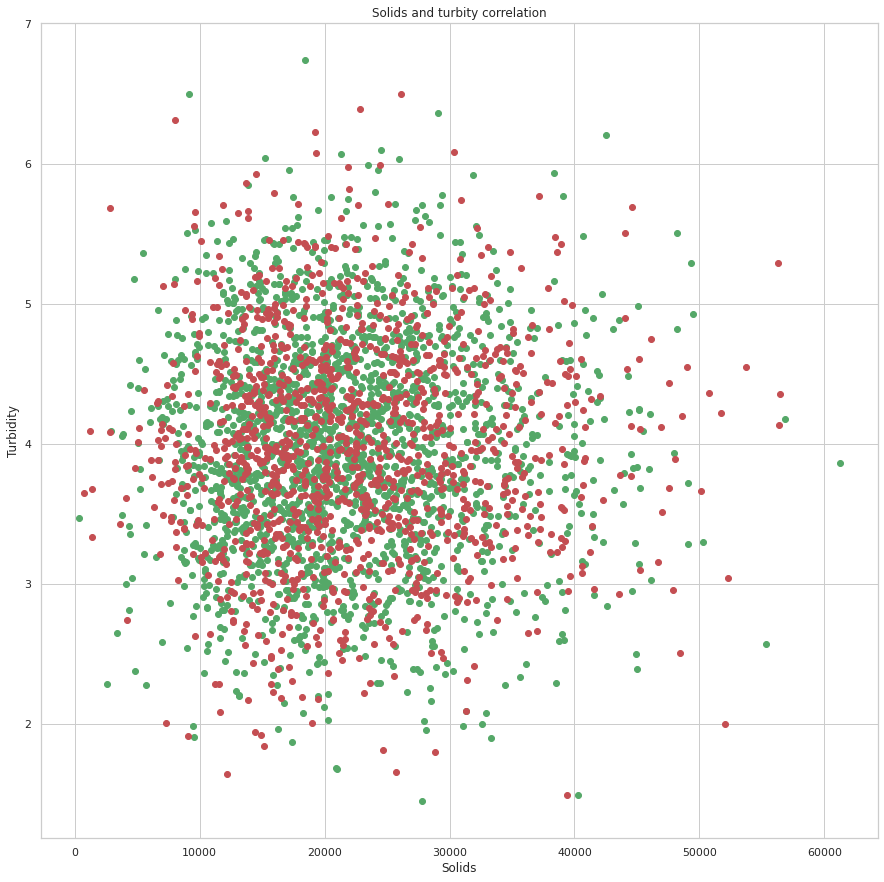

In [51]:
x = df[df['Potability']==0]['Solids']
y = df[df['Potability']==0]['Turbidity']
plt.scatter(x, y, color='g')  

x2 = df[df['Potability']==1]['Solids']
y2 = df[df['Potability']==1]['Turbidity']
plt.scatter(x2, y2, color='r') 

plt.title('Solids and turbity correlation')   
plt.ylabel('Turbidity')   
plt.xlabel('Solids')   
   
plt.show()

По этому графику можно сказать, что точки просто сгустились в одном "квадрате" без какой-либо системы. 

Построим аналогичный график для минерализации и сульфатов

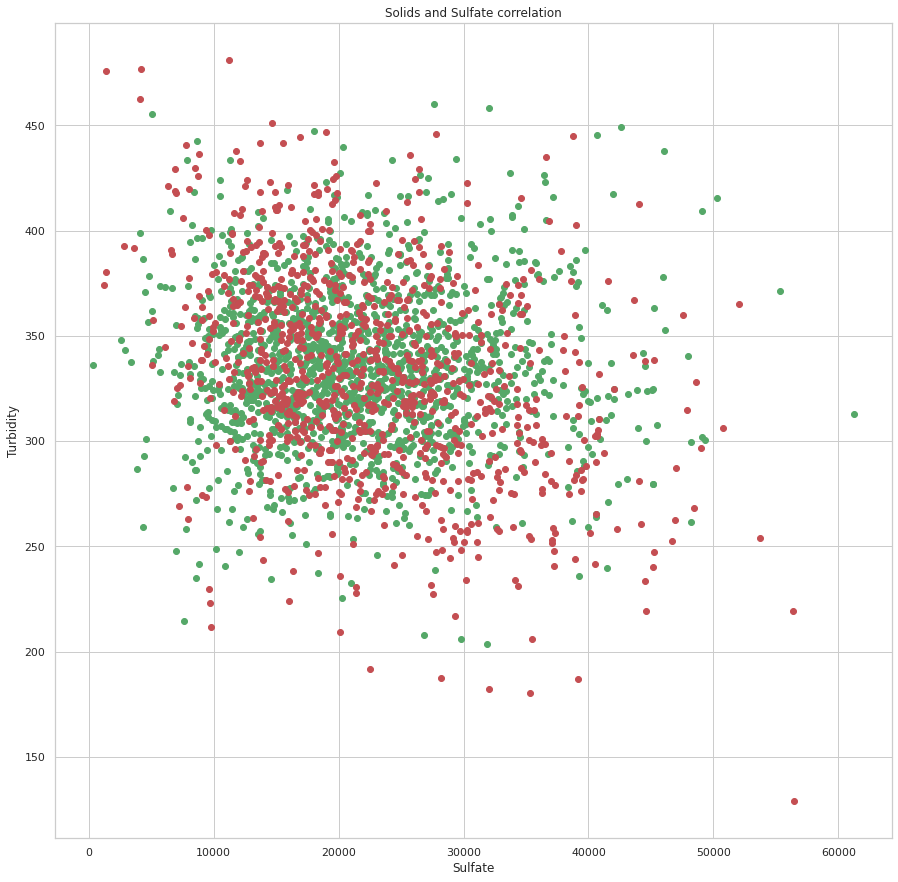

In [46]:
x = df[df['Potability']==0]['Solids']
y = df[df['Potability']==0]['Sulfate']

plt.scatter(x, y, color='g')  

x2 = df[df['Potability']==1]['Solids']
y2 = df[df['Potability']==1]['Sulfate']
plt.scatter(x2, y2, color='r') 

plt.title('Solids and Sulfate correlation')   
plt.ylabel('Turbidity')   
plt.xlabel('Sulfate')   
   
plt.show()

Здесь также наблюдается сгущение точек в одной области. Т.е. можно сделать вывод, о зависимсти сделать трудно, хотя по сути сульфаты это минералы.


Рассмотрим зависмость между мутностью воды и ее пригодностью для питья. Чтобы определить насколько верно можно определить пригодность воды для питья "на глаз".

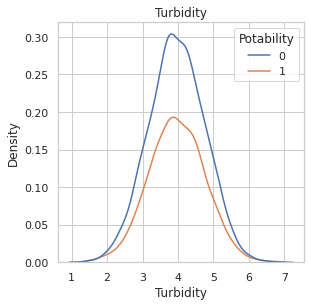

In [50]:
plt.subplot(3,3,9)
plt.title('Turbidity')
sns.kdeplot(x=df['Turbidity'],hue = df['Potability'])
plt.show()

Здесь наблюдается некоторая зависмость, однако мы не можем судить о пригодности воды лишь по одной ее прозрачности. Таким образом нужно принимать во внимание бОльшее число факторов. Теперь рассмотрим их все...

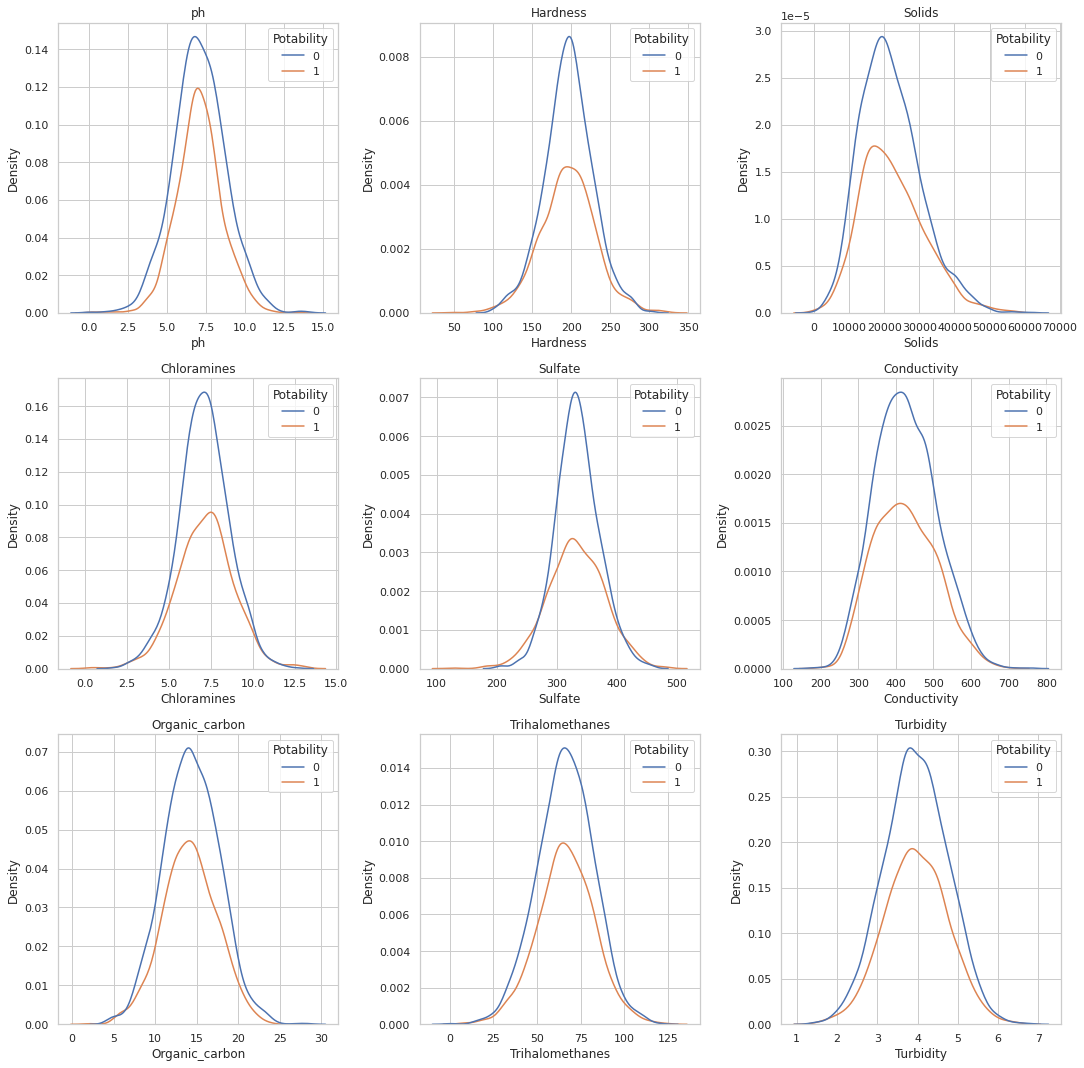

In [49]:
sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=df['ph'],hue = df['Potability'])
plt.subplot(3,3,2)
plt.title('Hardness')
sns.kdeplot(x=df['Hardness'],hue = df['Potability'])
plt.subplot(3,3,3)
plt.title('Solids')
sns.kdeplot(x=df['Solids'],hue = df['Potability'])
plt.subplot(3,3,4)
plt.title('Chloramines')
sns.kdeplot(x=df['Chloramines'],hue = df['Potability'])
plt.subplot(3,3,5)
plt.title('Sulfate')
sns.kdeplot(x=df['Sulfate'],hue = df['Potability'])
plt.subplot(3,3,6)
plt.title('Conductivity')
sns.kdeplot(x=df['Conductivity'],hue = df['Potability'])
plt.subplot(3,3,7)
plt.title('Organic_carbon')
sns.kdeplot(x=df['Organic_carbon'],hue = df['Potability'])
plt.subplot(3,3,8)
plt.title('Trihalomethanes')
sns.kdeplot(x=df['Trihalomethanes'],hue = df['Potability'])
plt.subplot(3,3,9)
plt.title('Turbidity')
sns.kdeplot(x=df['Turbidity'],hue = df['Potability'])
plt.tight_layout()

По этим графикам видно, что у каждой величины есть некоторое среднее значение при котором вода еще может быть питьевой. 

Рассмотрим как эти факторы зависят друг от друга в целом:

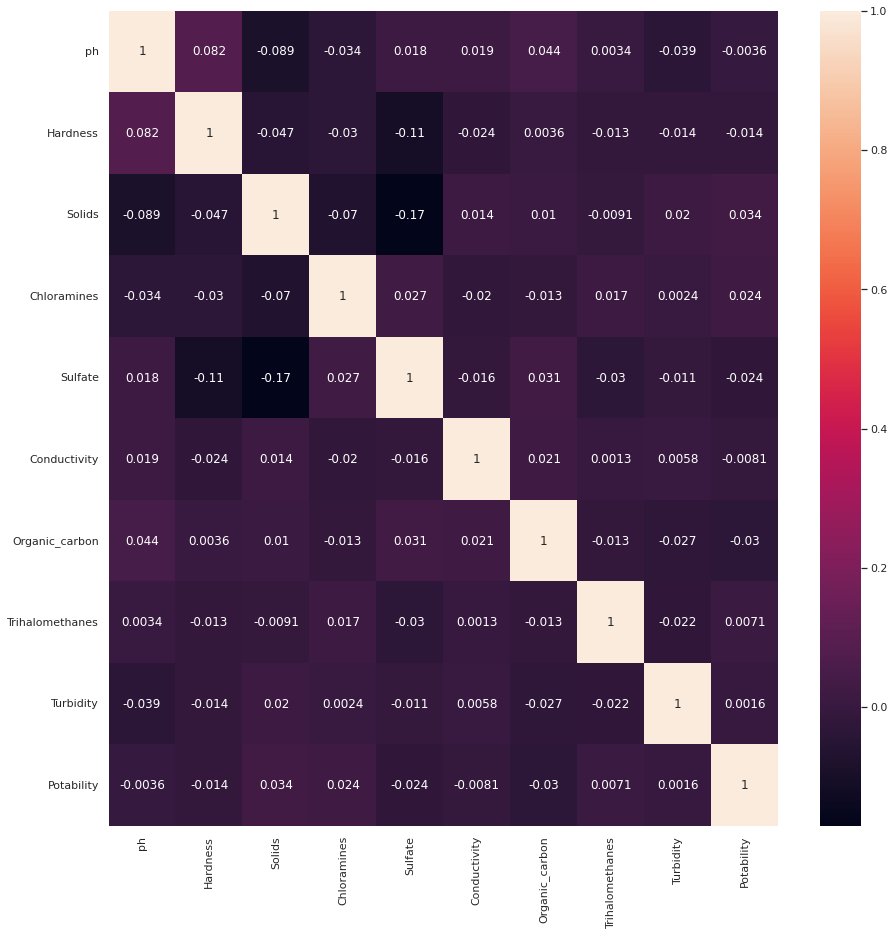

In [32]:
sns.heatmap(df.corr(),annot=True)

Из матрицы корреляций можно сделать вывод, что все рассмотренные характеристики НЕ зависят друг от друга. Что странно, так как в первых по первым графикам казалось, что зависимость все-таки имеется. 



По первичному анализу данных с помощью таблиц и графиков нельзя четко сказать о зависимости тех или иных факторов друг от друга. В целом непонятность происходит именно из-за последней таблицы.